# MARK5828 Quiz Week-6

## Question 1a (1.5 point)
### 1.a Re-run Marketing mix model (Section 4), for new Dataset. You need to show your results to get marks.

* customer.csv
* impression_60.csv
* transactions_60.csv

In [0]:
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats

In [0]:
from google.colab import files
files.upload()

In [0]:
#reading all the data 
cust = pd.read_csv("customer.csv")
imp_60 = pd.read_csv("impression_60.csv")
trans_60 = pd.read_csv("transactions_60.csv")

In [0]:
cust.head()

,id,past.purchase,email,direct
0,1,0,0,1
1,2,1,1,1
2,3,1,1,0
3,4,0,0,0
4,5,1,1,1


In [0]:
imp_60.head()

,id,date,channel,click
0,3836,2017-02-06,display,0
1,8331,2017-01-22,social,0
2,6009,2017-01-01,social,0
3,6261,2017-01-14,social,1
4,7848,2017-01-11,social,0


In [0]:
trans_60.head()

,id,date,last.touch,last.click
0,5334,2017-01-03,social,none
1,5882,2017-02-07,email,none
2,8473,2017-01-15,social,none
3,4186,2017-01-16,social,social
4,43,2017-01-23,social,social


In [0]:
transbyday = trans_60.groupby(['date']).size()
transbyday.head()

date
2017-01-01    198
2017-01-02    214
2017-01-03    350
2017-01-04    279
2017-01-05    247
dtype: int64

In [0]:
candence = pd.crosstab(index=imp_60['date'], columns=imp_60['channel'])
candence.head()

channel,direct,display,email,email.holdout,social
date,,,,,
2016-12-31,0,464,0,0,971
2017-01-01,0,2294,0,0,4480
2017-01-02,0,2266,0,0,4397
2017-01-03,0,2220,2879,753,4445
2017-01-04,0,2222,0,0,4643


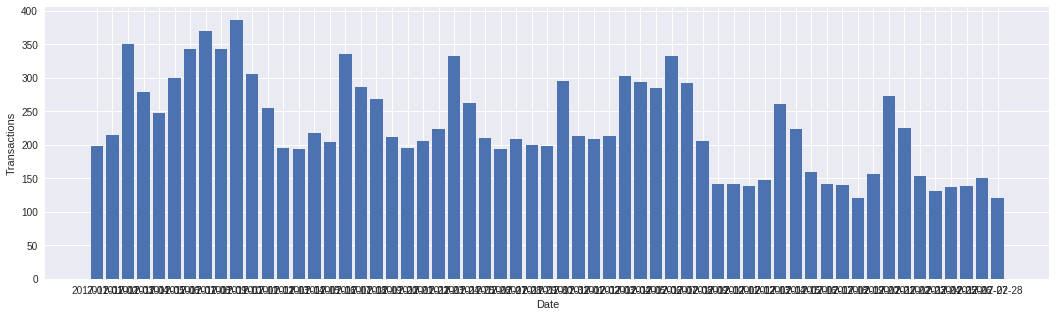

In [0]:
# Transactions over time.
plt.figure(figsize=(18,5))
plt.bar(transbyday.index, transbyday)
plt.xlabel('Date')
plt.ylabel('Transactions')
plt.show()

In [0]:
mdata = pd.concat([transbyday[0:56], candence[1:57]], axis=1)
mdata["trans"] = mdata[0].values
mdata = mdata.drop([0], axis=1)
mdata.head()

,direct,display,email,email.holdout,social,trans
date,,,,,,
2017-01-01,0,2294,0,0,4480,198
2017-01-02,0,2266,0,0,4397,214
2017-01-03,0,2220,2879,753,4445,350
2017-01-04,0,2222,0,0,4643,279
2017-01-05,0,2259,0,0,4567,247


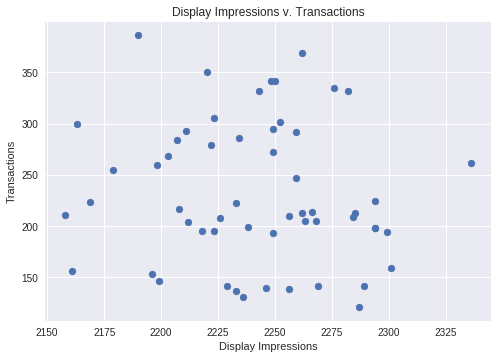

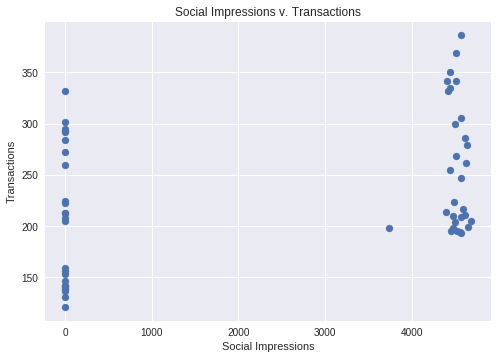

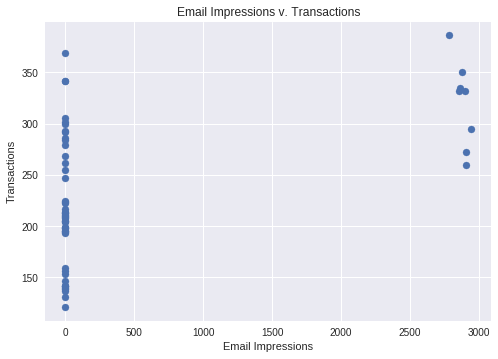

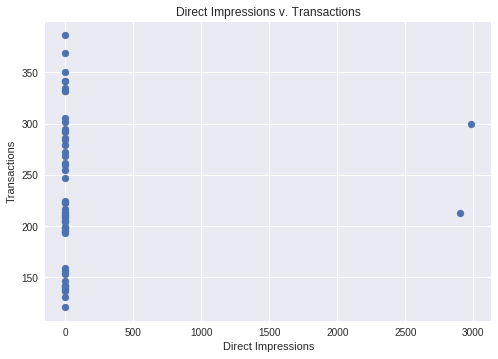

In [0]:
# Data exploration.
# Fig.1~Display Impressions v. Transactions
plt.scatter(mdata["display"], mdata["trans"])
plt.xlabel("Display Impressions")
plt.ylabel("Transactions")
plt.title("Display Impressions v. Transactions")
plt.show()

# Fig.2~Social Impressions v. Transactions
plt.scatter(mdata["social"], mdata["trans"])
plt.xlabel("Social Impressions")
plt.ylabel("Transactions")
plt.title("Social Impressions v. Transactions")
plt.show()

# Fig.3~Email Impressions v. Transactions
plt.scatter(mdata["email"], mdata["trans"])
plt.xlabel("Email Impressions")
plt.ylabel("Transactions")
plt.title("Email Impressions v. Transactions")
plt.show()

# Fig.4~Direct Impressions v. Transactions
plt.scatter(mdata["direct"], mdata["trans"])
plt.xlabel("Direct Impressions")
plt.ylabel("Transactions")
plt.title("Direct Impressions v. Transactions")
plt.show()

In [0]:
mdata.rename(columns={"email.holdout":"email_holdout"},inplace=True)
m1 = smf.ols("trans~direct+social+email+display+social+email_holdout",data=mdata).fit()
mdata.rename(columns={"email_holdout":"email.holdout"},inplace=True)
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  trans   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     8.106
Date:                Fri, 29 Mar 2019   Prob (F-statistic):           1.17e-05
Time:                        09:10:00   Log-Likelihood:                -299.55
No. Observations:                  56   AIC:                             611.1
Df Residuals:                      50   BIC:                             623.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       335.2913    424.916      0.789      0.434    -518.177    1188.760
direct            0.0137      0.013      1.020      0.312      -0.013       0.041
social            0.0118      0.003      3.547      0.001       0.005       0.018
email            -0.0519      0.175     -0.296      0.768      -0.403       0.300
display          -0.0657      0.189     -0.347      0.730      -0.446       0.314
email_holdout     0.3485      0.689      0.506      0.615      -1.034       1.731
==============================================================================
Omnibus:                        8.725   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                9.149
Skew:                           0.990   Prob(JB):                       0.0103
Kurtosis:                       2.948   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 1b (1.5 point)
### 1.a Re-run Model-based attribution model (Section 5), for new Dataset. You need to show your results to get marks.

* customer.csv
* impression_60.csv
* transactions_60.csv

In [0]:
# Data transform step 1: Summary of impressions by user and day.
tmp1 = imp_60.drop(["click"],axis=1).groupby(["id","date","channel"]).size()
tmp2 = tmp1.keys().to_frame(index=False)
tmp2["impr"] = tmp1.values

In [0]:
# Data transform step 2: Adding in users with zero impressions.
ids = sorted(set(cust["id"]))
dates = sorted(set(imp_60["date"]))
channels = sorted(set(imp_60["channel"]))

id_list = ids*(len(dates)*len(channels))
date_list = list(np.repeat(list(dates),len(ids)))*len(channels)
channel_list = np.repeat(list(channels),len(ids)*len(dates))
impr_list = 0*(len(dates)*len(ids)*len(channels))

tmp3 = pd.DataFrame({"id":id_list, "date":date_list,"channel":channel_list,"impr":impr_list})
adatal = pd.merge(tmp3, tmp2, how="left", on=["id","date","channel"])
adatal = adatal.drop(["impr_x"],axis=1)
adatal["impr_y"].fillna(0, inplace=True)
adatal.rename(columns={"impr_y":"impr"},inplace=True)
adatal["impr"] = adatal["impr"].astype(int)

In [0]:
# Data transform step 3: Switch to wide format.
tmp4 = tmp2.pivot(columns="channel",values="impr")
tmp4.fillna(0,inplace=True)
tmp4 = tmp4.astype(int)
tmp4["id"] = tmp2["id"].values
tmp4["date"] = tmp2["date"].values
tmp4.rename(columns={"direct":"impr.direct",
                     "display":"impr.display",
                     "email":"impr.email",
                     "email.holdout":"impr.email.holdout",
                     "social":"impr.social"},
            inplace=True)

tmp5 = tmp4.groupby(["id","date"]).sum()
tmp6 = tmp4.groupby(["id","date"]).size().keys().to_frame(index=False)
tmp7 = pd.DataFrame(data=tmp5.values,columns=["impr.direct","impr.display","impr.email","impr.email.holdout","impr.social"])
tmp7["id"] = tmp6["id"].values
tmp7["date"] = tmp6["date"].values


id_list_2 = ids*len(dates)
date_list_2 = list(np.repeat(list(dates),len(ids)))
impr_direct_list = 0*(len(dates)*len(ids))
impr_display_list = 0*(len(dates)*len(ids))
impr_email_list = 0*(len(dates)*len(ids))
impr_email_holdout_list = 0*(len(dates)*len(ids))
impr_social_list = 0*(len(dates)*len(ids))

adata = pd.DataFrame({"id":id_list_2, 
                      "date":date_list_2,
                      "impr.direct":impr_direct_list,
                      "impr.display":impr_display_list,
                      "impr.email":impr_email_list,
                      "impr.email.holdout":impr_email_holdout_list,
                      "impr.social":impr_social_list})

adata = adata.merge(tmp7, how="left", on=["id","date"])

adata.fillna(0,inplace=True)
adata = adata.drop(["impr.direct_x",
                    "impr.display_x",
                    "impr.email_x",
                    "impr.email.holdout_x",
                    "impr.social_x"],
                   axis=1)
adata = adata.astype({"impr.direct_y":int,
                      "impr.display_y":int,
                      "impr.email_y":int,
                      "impr.email.holdout_y":int,
                      "impr.social_y":int})

adata.rename(columns={"impr.direct_y":"impr.direct",
                      "impr.display_y":"impr.display",
                      "impr.email_y":"impr.email",
                      "impr.email.holdout_y":"impr.email.holdout",
                      "impr.social_y":"impr.social"},
             inplace=True)

adata.head(10)

,date,id,impr.direct,impr.display,impr.email,impr.email.holdout,impr.social
0,2016-12-31,1,0,0,0,0,0
1,2016-12-31,2,0,0,0,0,0
2,2016-12-31,3,0,0,0,0,0
3,2016-12-31,4,0,0,0,0,0
4,2016-12-31,5,0,0,0,0,0
5,2016-12-31,6,0,0,0,0,0
6,2016-12-31,7,0,0,0,0,0
7,2016-12-31,8,0,0,0,0,0
8,2016-12-31,9,0,0,0,0,0
9,2016-12-31,10,0,0,0,0,0


In [0]:
# Data transformation step 4: Add the daily transactions for each user.
tmp8 = trans_60.groupby(["id","date"]).size()
tmp9 = tmp8.keys().to_frame(index=False)
tmp9["trans"] = tmp8.values

ids_trans = sorted(set(trans_60["id"]))
dates_trans = sorted(set(trans_60["date"]))

id_trans_list = ids_trans*len(dates_trans)
date_trans_list = np.repeat(list(dates_trans),len(ids_trans))
trans_list = 0*(len(dates_trans)*len(ids_trans))

tmp_trans = pd.DataFrame({"id":id_trans_list, "date":date_trans_list,"trans":trans_list})
atrans = pd.merge(tmp_trans, tmp9, how="left", on=["id","date"])
atrans = atrans.drop(["trans_x"],axis=1)
atrans["trans_y"].fillna(0, inplace=True)
atrans.rename(columns={"trans_y":"trans"},inplace=True)
atrans["trans"] = atrans["trans"].astype(int)

adata_trans = adata.merge(atrans, how="left", on=["id","date"])
adata_trans["trans"].fillna(0, inplace=True)
adata_trans["trans"] = adata_trans["trans"].astype(int)
adata_trans.head(6)

,date,id,impr.direct,impr.display,impr.email,impr.email.holdout,impr.social,trans
0,2016-12-31,1,0,0,0,0,0,0
1,2016-12-31,2,0,0,0,0,0,0
2,2016-12-31,3,0,0,0,0,0,0
3,2016-12-31,4,0,0,0,0,0,0
4,2016-12-31,5,0,0,0,0,0,0
5,2016-12-31,6,0,0,0,0,0,0


In [0]:
# Data transformation step 5: Final tidy up of attribution modeling data.
adata_trans["date"] = adata_trans["date"].astype(str)
adata_trans = adata_trans.loc[(adata_trans["date"]!="2016-12-31") & (adata_trans["date"]!="2017-02-27")]
adata = adata_trans.merge(cust, how="left", on=["id"])
adata.rename(columns={"impr.direct":"direct",
                      "impr.display":"display",
                      "impr.email":"email",
                      "impr.email.holdout":"email.holdout",
                      "impr.social":"social",
                      "trans":"trans",
                      "past.purchase":"past.purchase",
                      "email":"has.email",
                      "direct":"has.direct"},
             inplace=True)
adata.head(6)

,date,id,direct,display,email,email.holdout,social,trans,past.purchase,has.email,has.direct
0,2017-01-01,1,0,0,0,0,1,0,0,0,1
1,2017-01-01,2,0,0,0,0,0,0,1,1,1
2,2017-01-01,3,0,0,0,0,0,0,1,1,0
3,2017-01-01,4,0,0,0,0,0,0,0,0,0
4,2017-01-01,5,0,1,0,0,0,0,1,1,1
5,2017-01-01,6,0,0,0,0,0,0,0,0,0


In [0]:
adata.rename(columns={"past.purchase":"past_purchase"},inplace=True)
m3 = smf.glm("trans ~ direct + display + email + social + past_purchase", data=adata, family=sm.families.Binomial()).fit()
adata.rename(columns={"past_purchase":"past.purchase"},inplace=True)
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  trans   No. Observations:               570000
Model:                            GLM   Df Residuals:                   569994
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -60795.
Date:                Fri, 29 Mar 2019   Deviance:                   1.2159e+05
Time:                        09:10:10   Pearson chi2:                 5.61e+05
No. Iterations:                     8                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.4943      0.018   -253.187      0.000      -4.529      -4.460
direct            0.2821      0.070      4.025      0.000       0.145       0.419
display           0.1268      0.012     10.386      0.000       0.103       0.151
email             0.6058      0.032     18.677      0.000       0.542       0.669
social            0.2323      0.010     23.167      0.000       0.213       0.252
past_purchase     0.9876      0.020     49.369      0.000       0.948       1.027
=================================================================================
"""

## Question 2 (0.5 point)
#### Explain your results in Question 1a, 1b. Especially, report the most significant impression in both the cases.

Question 1a: The most significant impression is social impressions, and we get 0.0118 additional transactions for each social impression


Question 1b: The most significant impression is email impression 

## Question 3 (1 point)
#### Create an insightful plot/Graph/Visualization from the datasets mentioned in this tutorial. You may not use the plots/charts already mentioned in the tutorial, specifically, you need to convey a new message.

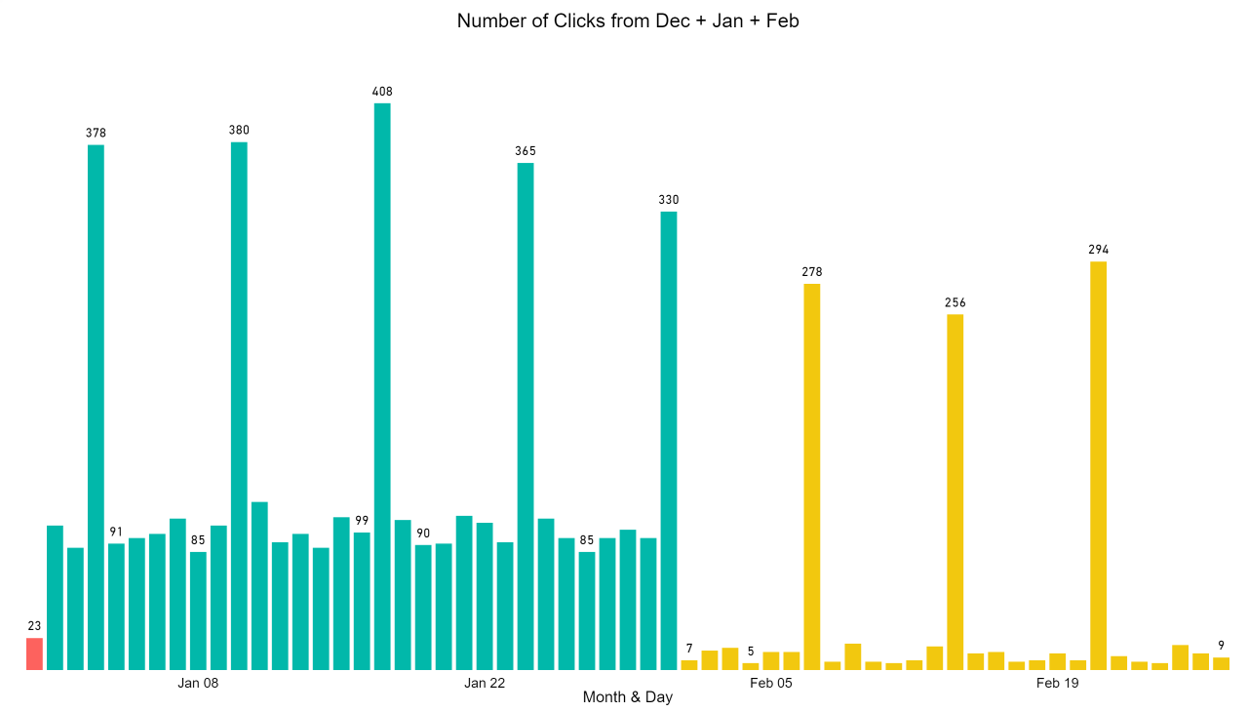

In [4]:
from IPython.display import Image
Image('Picture1.png')

## Question 4 (0.5 point)
### Please List down incorrect assumptions behind last touch model mentioned in the Lecture.

In [0]:
The incorrect assumptions behind last touch model are that other ads might have 
influenced the customer and contributed to the sale and 
that the last touch model assumes that customers would not have bought 
if they had not seen the ads.